In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Resources/lending_data.csv")
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [5]:
# no imputation
# no encoding
# we need a scaler 

In [6]:
# check for imbalance
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [7]:
2500/len(df)

0.03224308708212959

In [8]:
#There'a alot of imbalance!!

In [9]:
#Bad Models 

In [10]:
#Recall on the positve class 

In [11]:
# Feature selection
# correlation analysis
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


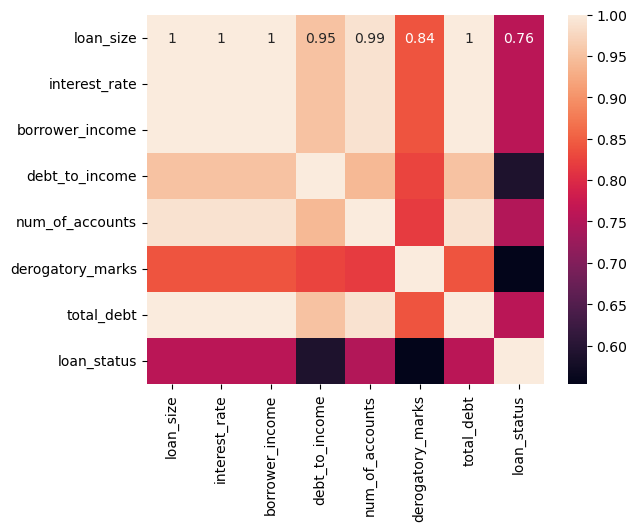

In [12]:
 sns.heatmap(corrs, annot=True)
plt.show()
#Not sure why my annot is not filling in the heat map 

In [13]:
abs(corrs.loan_status).sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

In [14]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [15]:
features=['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt',]
     

In [16]:
# SCALE the NUMERIC Features FIRST

# subset
df_sub = df.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [17]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [18]:
df_scaled.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676


In [19]:
# Step 1: Get the data
X = df_scaled
y = df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages

In [20]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[55958   319]
 [   37  1838]]
    
    AUC: 0.9943631063015679

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.98      0.91      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.95     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [   14   611]]
    
    AUC: 0.996492776800469

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384

    


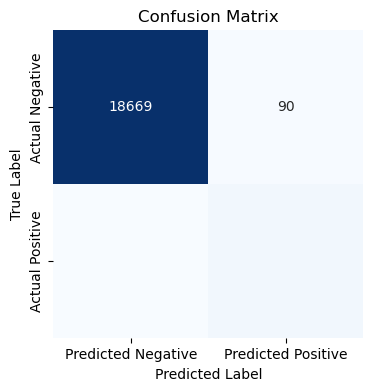

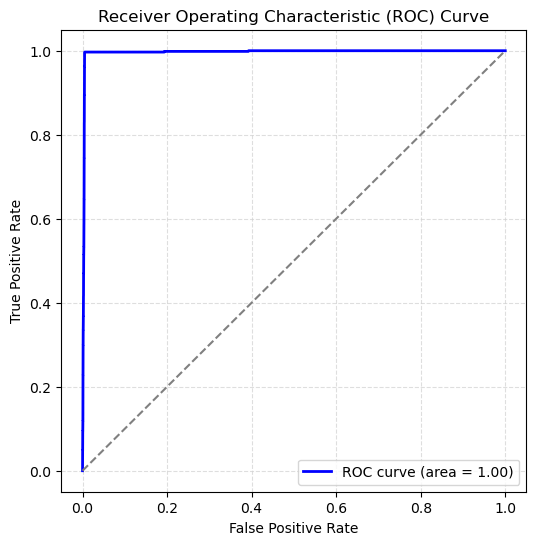

In [21]:
 # Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[56224    53]
 [  102  1773]]
    
    AUC: 0.9998578886578886

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18683    76]
 [  123   502]]
    
    AUC: 0.9366155552001707

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.80      0.83       625

    accuracy                           0.99     19384
   macro avg       0.93      0.90      0.91     19384
weighted avg       0.99      0.99      0.99     19384

    


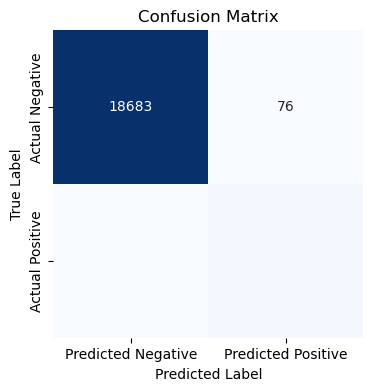

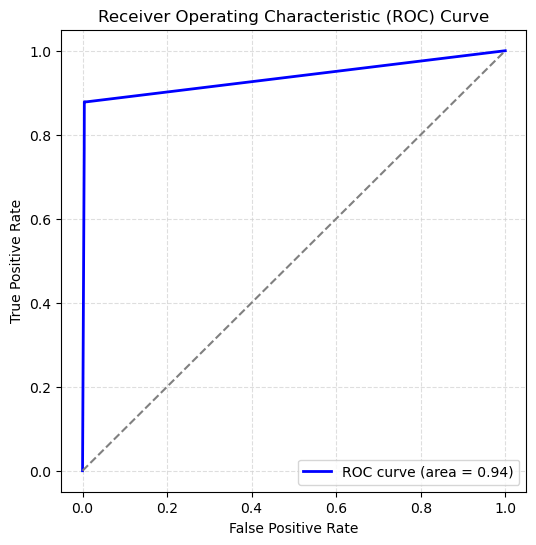

In [22]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[56148   129]
 [   27  1848]]
    
    AUC: 0.999823364192595

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.93      0.99      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18681    78]
 [   79   546]]
    
    AUC: 0.9958888213657443

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    


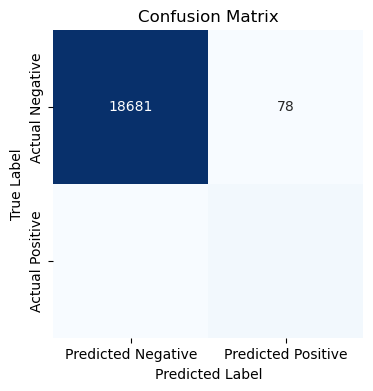

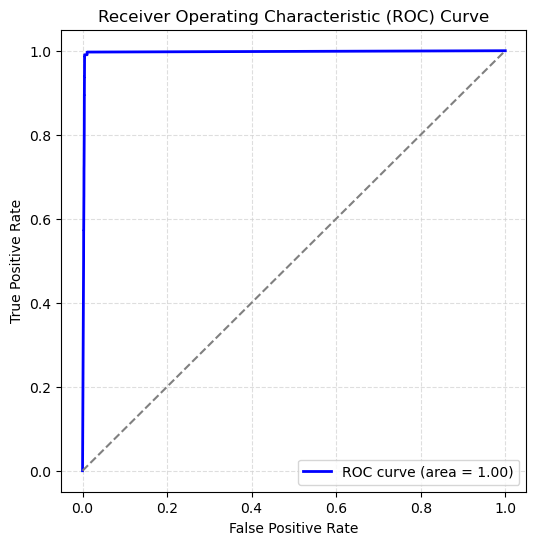

In [23]:
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55949   328]
 [   12  1863]]
    
    AUC: 0.9957361527207681

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    3   622]]
    
    AUC: 0.9953638466869237

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


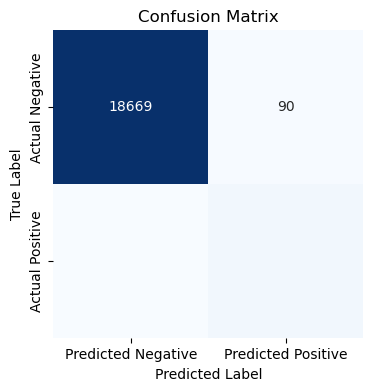

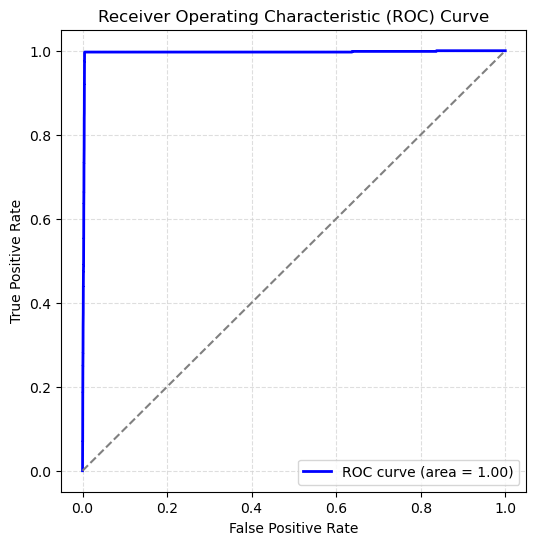

In [24]:
 # Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55951   326]
 [   15  1860]]
    
    AUC: 0.9973727478958248

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    5   620]]
    
    AUC: 0.996005202835972

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


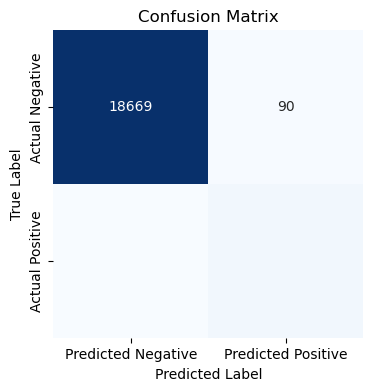

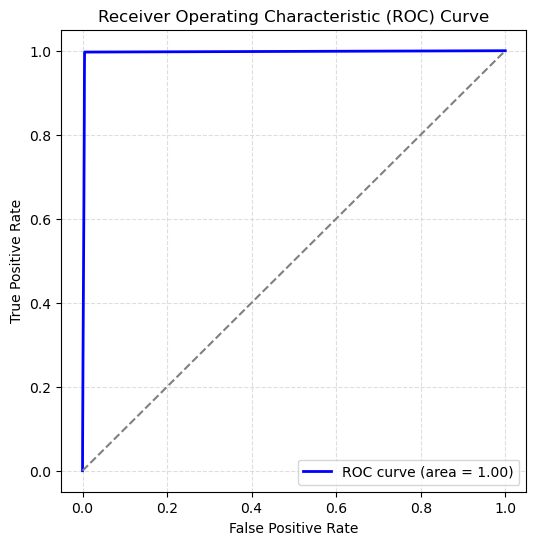

In [25]:
 # Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[56224    53]
 [  102  1773]]
    
    AUC: 0.9998578886578886

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18681    78]
 [  110   515]]
    
    AUC: 0.9614358121435045

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.82      0.85       625

    accuracy                           0.99     19384
   macro avg       0.93      0.91      0.92     19384
weighted avg       0.99      0.99      0.99     19384

    


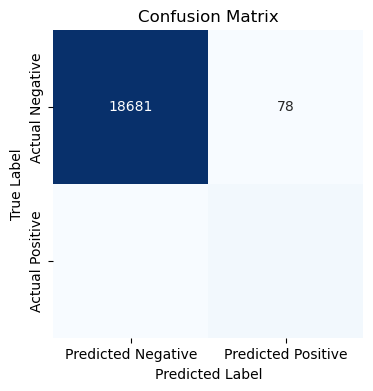

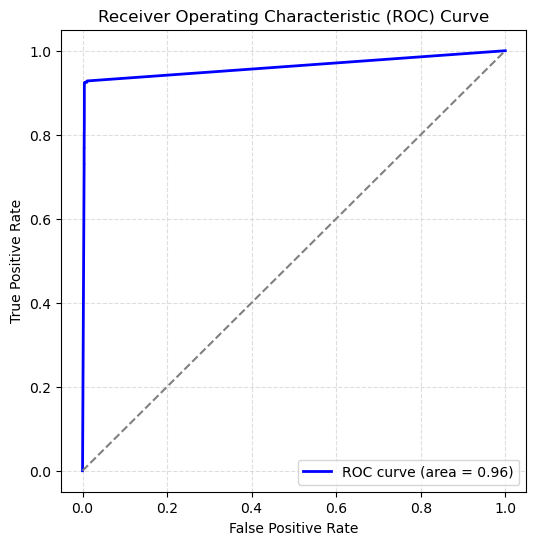

In [26]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55954   323]
 [   15  1860]]
    
    AUC: 0.9970676854369163

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18669    90]
 [    5   620]]
    
    AUC: 0.9964305986459833

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


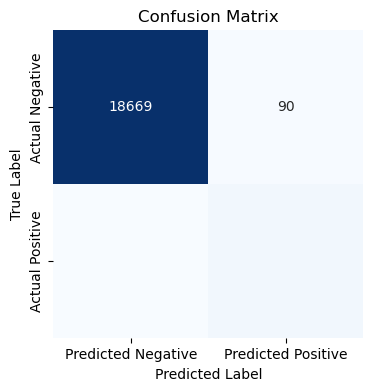

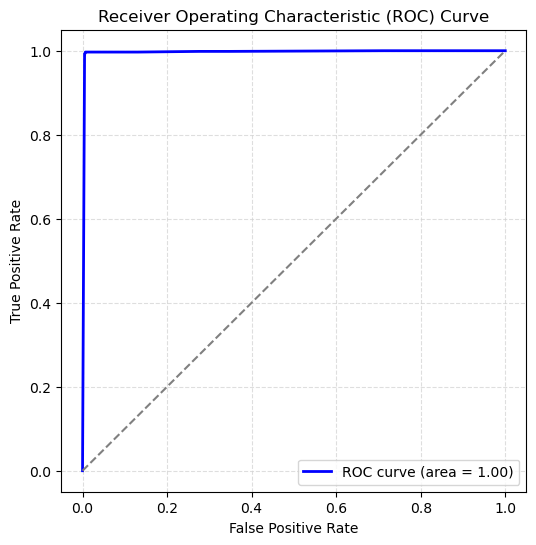

In [27]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55965   312]
 [   10  1865]]
    
    AUC: 0.9983701855701855

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: 
    [[18668    91]
 [    6   619]]
    
    AUC: 0.9952849938696093

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      1.00     19384

    


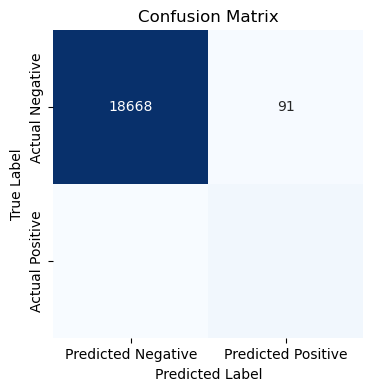

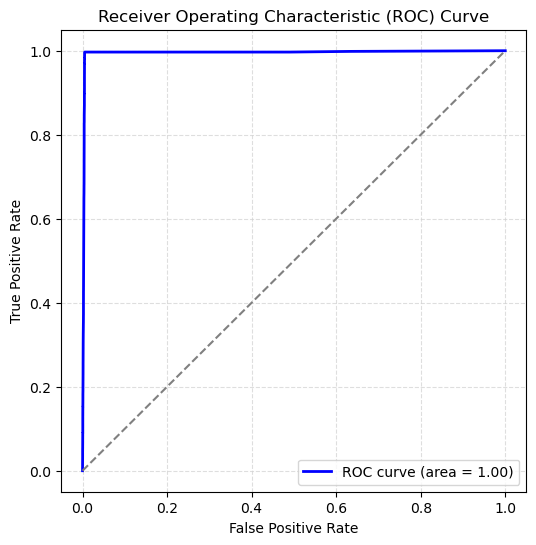

In [28]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [ ]:
!conda install -c conda-forge xgboost

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/dev

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  conda-forge
    ca-certificates-2024.8.30  |       hf0a4a13_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    libcxx-18.1.8              |       h3ed4263_7         427 KB  conda-forge
    libxgboost-2.1.1           |   cpu_h27903ac_2         1.3 MB  conda-forge
    llvm-openmp-18.1.8         |       hde57baf_1         270 KB  conda-forge
    openssl-3.3.2              |       h8359307_0         2.7 MB  conda-forge
    py-xgboost-2.1.1           | cpu_pyhb442362_2         132 KB  conda-forge
    xgboost-2.1.1              | cpu_p

In [ ]:
[y]

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [ ]:
#could not get passed the xgboost trid install in nb and terminal had no results I just would like to turn this in to focus on the next HW

In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [ ]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!

# Review the DataFrame
# YOUR CODE HERE!

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]

# Separate the X variable, the features
# YOUR CODE HERE!

In [ ]:
# Review the y variable Series
# YOUR CODE HERE!

In [ ]:
# Review the X variable DataFrame
# YOUR CODE HERE!

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the model using training data
# YOUR CODE HERE!

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [ ]:
# Make a prediction using the testing data
# YOUR CODE HERE!

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

---